# Import

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import joblib # save and import model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

In [19]:
data_location = "/content/gdrive/MyDrive/First Year 2022-23/Spring 1 9-5 1 2023/NSC 325 Invester Program Energy/arXiv/data"
model_location = "/content/gdrive/MyDrive/First Year 2022-23/Spring 1 9-5 1 2023/NSC 325 Invester Program Energy/arXiv/model"

# read

In [20]:
model = joblib.load(f"{model_location}/random_forest_model.joblib")
RF500 = pd.read_csv(f"{model_location}/random_forest_500.csv", index_col=0)

In [21]:
df = pd.read_csv(f"{data_location}/UT_Comp_Seq_encode.csv", index_col=0)

In [22]:
x = df.drop('12 month Cum Prod', axis = 1) # Features
y = df['12 month Cum Prod']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 121)

In [24]:
min(y), max(y)

(0.28, 495.81)

# 500 realizations

In [25]:
hyperpar = {'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_estimators': 200, 'random_state': 121}

In [ ]:
MSE500, R2500 = list(RF500['MSE']), list(RF500['R2'])

In [ ]:
for i in range(RF500.index[-1]+1, 500):
  hyperpar.update({'random_state':i})
  model = RandomForestRegressor(**hyperpar)
  forest_fit = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # analyze
  R2 = r2_score(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  # store
  R2500.append(R2)
  MSE500.append(MSE)

In [ ]:
pd.DataFrame({"MSE":MSE500, "R2":R2500}).to_csv(f"{model_location}/random_forest_500.csv")

# read

In [5]:
RF500 = pd.read_csv(f"{model_location}/random_forest_500.csv", index_col=0)

In [6]:
rmse500 = np.sqrt(RF500['MSE'])
ci500 = np.percentile(rmse500, [2.5, 97.5])

In [32]:
ci500

array([19.96474977, 20.25243173])

In [7]:
rmse100 = np.sqrt(RF500['MSE'][:100])
ci100 = np.percentile(rmse100, [2.5, 97.5])

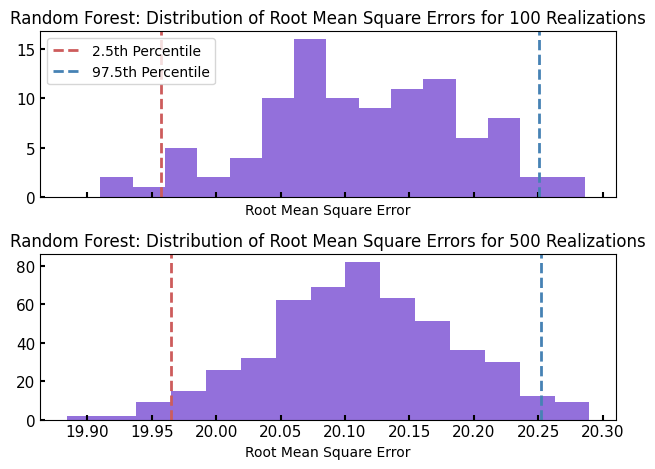

In [14]:
n_bins = 15
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

axs[0].hist(rmse100, color="mediumpurple", bins=n_bins)
axs[0].axvline(ci100[0], color='indianred', linewidth=2, linestyle = '--', label="2.5th Percentile")
axs[0].axvline(ci100[1], color='steelblue', linewidth=2, linestyle = '--', label="97.5th Percentile")

axs[0].set_xlabel('Root Mean Square Error')
axs[0].set_title('Random Forest: Distribution of Root Mean Square Errors for 100 Realizations')
axs[0].legend()
axs[0].tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')


axs[1].hist(rmse500, color="mediumpurple", bins=n_bins)
axs[1].axvline(ci500[0], color='indianred', linewidth=2, linestyle = '--', label="2.5th Percentile")
axs[1].axvline(ci500[1], color='steelblue', linewidth=2, linestyle = '--', label="97.5th Percentile")

axs[1].set_xlabel('Root Mean Square Error')
axs[1].set_title('Random Forest: Distribution of Root Mean Square Errors for 500 Realizations')

axs[1].tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')
#axs[1].grid()
plt.show()

# Predicted vs. Actual

In [26]:
model = RandomForestRegressor(**hyperpar)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [30]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {:.2f}".format(rmse))

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.2f}".format(r2))


Mean Squared Error: 400.53
Root Mean Squared Error: 20.01
Mean Absolute Error: 10.34
R2 Score: 0.86


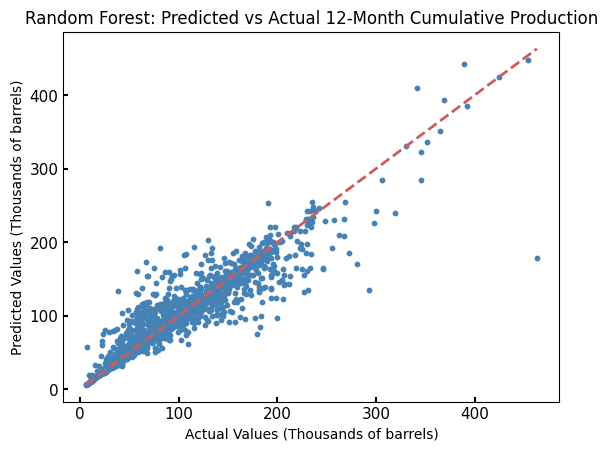

In [31]:
plt.scatter(y_test, y_pred, color='steelblue', s=10)
plt.xlabel("Actual Values (Thousands of barrels)")
plt.ylabel("Predicted Values (Thousands of barrels)")
plt.title("Random Forest: Predicted vs Actual 12-Month Cumulative Production")

# Plot the identity line (y=x) for reference
identity_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(identity_line, identity_line, color='indianred', linewidth=2, linestyle='--')
plt.tick_params(axis='both', which='both', width=1.5, labelsize=11, direction='in')

plt.show()